# Spark the poop out of it

In [23]:
!pip install pyspark

## 1 Build Data Frame

### 1.1 Split of Data

In [2]:
import pandas as pd
filename85 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/BD/0.Final_Test_Data_set/data_set_to_test.csv'
data_set_initial_6 = pd.read_csv(filename85, sep=',', encoding='utf8')
data_set_initial_6.head()

,id,createTime,likeCount,commentCount,tags_count,translation_len,label_sentiment,score_sentiment,score_hate,fk_readability,...,language_0,language_1,productType_carousel_container,productType_clips,productType_feed,productType_igtv,harmonic_centrality,degree_centrality,closeness_centrality,Betweenness
0,11540,2017-12-31 20:10:58+00:00,17552,295,0,4,1,0.992561,0.888707,121.220,...,1,0,0,0,1,0,33.523858,0.012243,0.027949,216.332754
1,32532,2018-02-05 13:40:01+00:00,5305,17,19,962,1,0.999602,0.990074,-106.935,...,0,1,1,0,0,0,33.523858,0.012243,0.027949,216.332754
2,32530,2018-02-15 15:52:22+00:00,15077,34,4,18,1,0.997795,0.952006,97.025,...,1,0,0,0,1,0,33.523858,0.012243,0.027949,216.332754
3,8265,2018-04-12 17:25:11+00:00,1081,79,3,571,-1,-0.990802,0.984654,-150.322,...,0,1,1,0,0,0,33.523858,0.012243,0.027949,216.332754
4,8264,2018-04-15 16:47:31+00:00,1035,37,14,597,-1,-0.987855,0.983755,-262.105,...,0,1,0,0,1,0,33.523858,0.012243,0.027949,216.332754


#### Choose the data set one at the time

#### Data Set 1

In [24]:
## Here we are going to take only the variables we want to the dataset, splitting the features from the label objective

data_set_1=data_set_initial_6[["label_hate","likeCount","commentCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count"]].copy()
features = data_set_1.drop('label_hate', axis=1)
labels = data_set_1['label_hate']

features_dt_labels=["likeCount","commentCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count"]

#### Data Set 2

In [ ]:
## Add variables from the sentiment analysis

data_set_2=data_set_initial_6[["label_hate","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade"]].copy()
features = data_set_2.drop('label_hate', axis=1)
labels = data_set_2['label_hate']

features_dt_labels=["commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade"]


#### 3rd Data Set

In [ ]:
## Add variables from the sentiment analysis NER
data_set_3=data_set_initial_6[["label_hate","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade","CARDINAL","GPE","EVENT","FAC","DATE","LANGUAGE","LAW","LOC","MONEY","NORP","ORDINAL","ORG","PERCENT","PERSON","PRODUCT","QUANTITY","TIME","WORK_OF_ART"]].copy()
features = data_set_3.drop('label_hate', axis=1)
labels = data_set_3['label_hate']

features_dt_labels=["label_hate","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade","CARDINAL","GPE","EVENT","FAC","DATE","LANGUAGE","LAW","LOC","MONEY","NORP","ORDINAL","ORG","PERCENT","PERSON","PRODUCT","QUANTITY","TIME","WORK_OF_ART"]


#### 4th Data Set

In [198]:
## Add variables from the sentiment analysis SNA
data_set_4=data_set_initial_6[["label_hate","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade","CARDINAL","GPE","EVENT","FAC","DATE","LANGUAGE","LAW","LOC","MONEY","NORP","ORDINAL","ORG","PERCENT","PERSON","PRODUCT","QUANTITY","TIME","WORK_OF_ART","harmonic_centrality","degree_centrality","closeness_centrality","Betweenness"]].copy()
features = data_set_4.drop('label_hate', axis=1)
labels = data_set_4['label_hate']

features_dt_labels=["label_hate","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade","CARDINAL","GPE","EVENT","FAC","DATE","LANGUAGE","LAW","LOC","MONEY","NORP","ORDINAL","ORG","PERCENT","PERSON","PRODUCT","QUANTITY","TIME","WORK_OF_ART","harmonic_centrality","degree_centrality","closeness_centrality","Betweenness"]


### 1.2 Split of Data

In [25]:
#Split the data
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

print(Counter(train_labels))
print(Counter(test_labels))
print(f'The class we want to predict is unbalanced the prediction models had to be Smote to be able to learn')

#Source: https://medium.com/grabngoinfo/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037
#Source: https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf

Counter({0: 20315, 1: 169})
Counter({0: 6773, 1: 55})
The class we want to predict is unbalanced the prediction models had to be Smote to be able to learn


In [27]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
train_features_smote, train_labels_smote= smote.fit_resample(train_features, train_labels)
# Check the number of records after over sampling
print(sorted(Counter(train_labels_smote).items()))

[(0, 20315), (1, 20315)]


In [28]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
train_features_rus, train_labels_rus= rus.fit_resample(train_features, train_labels)
# Check the number of records after under sampling
print(sorted(Counter(train_labels_rus).items()))

[(0, 169), (1, 169)]


### 1.3 Choose the split to apply below just one at the time

In [29]:
#Unbalanced Data
train_features['label']=train_labels
test_features['label']=test_labels

training_df=train_features.copy()
test_df=train_features.copy()

In [47]:
#Oversampling through SMOTE
train_features_smote['label']=train_labels_smote
test_features['label']=test_labels

training_df=train_features_smote.copy()
test_df=train_features.copy()

In [63]:
#Random Undersampling
train_features_rus['label']=train_labels_rus
test_features['label']=test_labels

training_df=train_features_rus.copy()
test_df=train_features.copy()

### 1.4 Upload to Spark

In [64]:
#Next we will be passing the pandas dataframe to Spark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("1st Try").getOrCreate()
  
#probabily need to install Java if you do not have it and create dependencies consult the next website to have an ideia: https://www.computerhope.com/issues/ch000549.htm#windows10 and https://stackoverflow.com/questions/56213955/python-worker-failed-to-connect-back-in-pyspark-or-spark-version-2-3-1
sparkDF_train=spark.createDataFrame(training_df) 
sparkDF_test=spark.createDataFrame(test_df) 

#sparkDF.printSchema()
#sparkDF.show(2)

In [65]:
#Next will have to addopt the data set to be able to properly split and train the models
#Used the defined feature labels above and the target labels above
labels = training_df['label']

feature_headers = list(features.columns.values)
label_headers = labels.name

#
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols = feature_headers, outputCol='features')

trainingData = va.transform(sparkDF_train)
testData = va.transform(sparkDF_test)

trainingData = trainingData.select(['features', label_headers])
testData = testData.select(['features', label_headers])


print(type(feature_headers))
print(type(label_headers))

#Source: https://www.datatechnotes.com/2021/06/pyspark-decision-tree-classification.html
trainingData.show(3)

<class 'list'>
<class 'str'>
+--------------------+-----+
|            features|label|
+--------------------+-----+
|(9,[0,1,3,4],[225...|    0|
|[1411.0,15.0,6.0,...|    0|
|[2924.0,11.0,3.0,...|    0|
+--------------------+-----+
only showing top 3 rows



## 2. Pipeline

### 2.1 Decision Tree

#### 2.1.1 Model Training

In [66]:
#Next we will be defing the decision tree

from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.mllib.util import MLUtils

# Split the data into training and test sets (30% held out for testing) We are not using the below function due to the random split it performs
#(trainingData, testData) = va_df.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
#  Empty categoricalFeaturesInfo indicates all features are continuous.
dtc = DecisionTreeClassifier(featuresCol="features", labelCol="label")
dtc = dtc.fit(trainingData)

# After training we will be testing out dataset
pred = dtc.transform(testData)
pred.show(3)

+--------------------+-----+-------------+--------------------+----------+
|            features|label|rawPrediction|         probability|prediction|
+--------------------+-----+-------------+--------------------+----------+
|[1724.0,17.0,1.0,...|    0|  [47.0,27.0]|[0.63513513513513...|       0.0|
|[120.0,7.0,1.0,1....|    0|   [19.0,1.0]|         [0.95,0.05]|       0.0|
|[1387.0,19.0,0.0,...|    0|   [19.0,1.0]|         [0.95,0.05]|       0.0|
+--------------------+-----+-------------+--------------------+----------+
only showing top 3 rows



#### 2.1.2 Evaluation

In [67]:
# After training the model, we'll predict test data and check the accuracy metrics. Here, we can use MulticlassClassificationEvaluator to check the accuracy. 
#Confusion matrix can be created by using confusion_matrix function of sklearn.metrics module.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

evaluator=MulticlassClassificationEvaluator(predictionCol="prediction")
#print("Prediction Accuracy: ", acc)

y_pred=pred.select("prediction").collect()
y_orig=pred.select("label").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

#Define the Evaluation Metrics
#Accuracy = (TP+TN)/(TP+TN+FP+FN)
accu_dt = evaluator.evaluate(pred)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
prec_dt=cm[1,1]/(cm[1,1]+cm[1,0])

#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
recall_dt=cm[1,1]/(cm[1,1]+cm[0,1])

#The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
f1_dt=2*((prec_dt*recall_dt)/(prec_dt+recall_dt))
#F1 = 2 * (precision * recall) / (precision + recall)

# Instantiate metrics object
metrics_dt = BinaryClassificationEvaluator()
auc_dt=metrics_dt.evaluate(pred, {metrics_dt.metricName: 'areaUnderROC'})

#Source: https://shihaojran.com/distributed-machine-learning-using-pyspark/

Confusion Matrix:
[[10698  9617]
 [   43   126]]


#### 2.1.3 ROC

C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

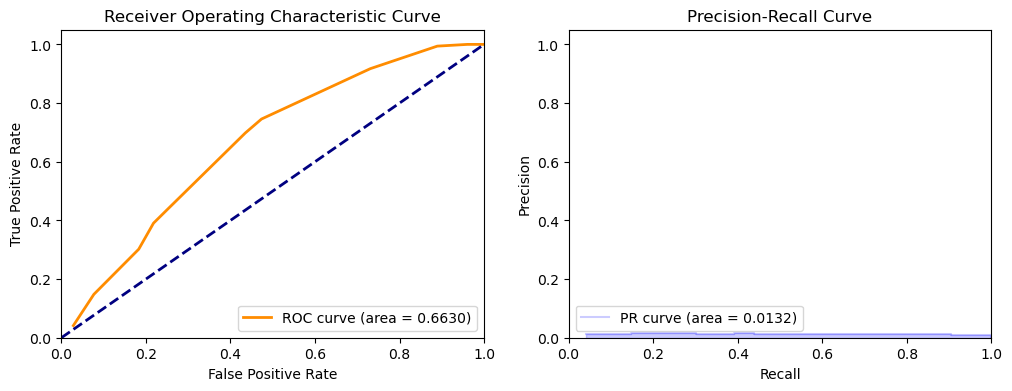

In [68]:
#Plot the Roc Curve
from matplotlib import pyplot as plt
from handyspark import BinaryClassificationMetrics


bcm_dt = BinaryClassificationMetrics(pred, scoreCol='probability', labelCol='label')
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm_dt.plot_roc_curve(ax=axs[0])
bcm_dt.plot_pr_curve(ax=axs[1])

#Source: https://colab.research.google.com/github/dvgodoy/handyspark/blob/master/notebooks/Exploring_Titanic.ipynb#scrollTo=8w7mJX30_C91
#SOurce: https://towardsdatascience.com/binary-classifier-evaluation-made-easy-with-handyspark-3b1e69c12b4f
#Source: https://handyspark.readthedocs.io/en/latest/includeme.html

In [53]:
#Check the threshold 
bcm_dt.getMetricsByThreshold().toPandas()

C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


,threshold,fpr,recall,precision
0,0.705750,0.012848,0.047337,0.029740
1,0.622155,0.025105,0.082840,0.026718
2,0.588810,0.070687,0.171598,0.019795
3,0.545455,0.073394,0.183432,0.020368
4,0.544276,0.083780,0.213018,0.020713
5,0.540541,0.100517,0.242604,0.019683
6,0.420222,0.180113,0.349112,0.015869
7,0.330658,0.241693,0.437870,0.014848
8,0.287428,0.314792,0.497041,0.012965
9,0.224171,0.414964,0.585799,0.011607


In [78]:
#Check its corresponding Confusion Matrix as well
print(bcm_dt.print_confusion_matrix(.003153))

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 199.0 failed 1 times, most recent failure: Lost task 0.0 in stage 199.0 (TID 736) (DESKTOP-RN7371E.lan executor driver): java.lang.ClassCastException: scala.Tuple3 cannot be cast to scala.Tuple2
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:461)
	at org.apache.spark.api.python.SerDeUtil$AutoBatchedPickler.next(SerDeUtil.scala:90)
	at org.apache.spark.api.python.SerDeUtil$AutoBatchedPickler.next(SerDeUtil.scala:80)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.api.python.SerDeUtil$AutoBatchedPickler.foreach(SerDeUtil.scala:80)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:307)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:732)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:438)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2066)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:272)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.lang.ClassCastException: scala.Tuple3 cannot be cast to scala.Tuple2
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:461)
	at org.apache.spark.api.python.SerDeUtil$AutoBatchedPickler.next(SerDeUtil.scala:90)
	at org.apache.spark.api.python.SerDeUtil$AutoBatchedPickler.next(SerDeUtil.scala:80)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.api.python.SerDeUtil$AutoBatchedPickler.foreach(SerDeUtil.scala:80)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:307)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:732)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:438)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2066)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:272)


### 2.2 Random Forest

#### 2.2.1 Model Training

In [69]:
# Train a Random Forest
#  Empty categoricalFeaturesInfo indicates all features are continuous.
from pyspark.ml.classification import RandomForestClassifier

rfc = RandomForestClassifier(featuresCol="features", labelCol="label")
rfc = rfc.fit(trainingData)

# After training we will be testing out dataset
pred_rf = rfc.transform(testData)
pred_rf.show(3)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1724.0,17.0,1.0,...|    0|[11.0377445629900...|[0.55188722814950...|       0.0|
|[120.0,7.0,1.0,1....|    0|[15.5788874071639...|[0.77894437035819...|       0.0|
|[1387.0,19.0,0.0,...|    0|[13.2439684401940...|[0.66219842200970...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 3 rows



#### 2.2.2 Model Evaluation

In [70]:
# After training the model, we'll predict test data and check the accuracy metrics. Here, we can use MulticlassClassificationEvaluator to check the accuracy. 
#Confusion matrix can be created by using confusion_matrix function of sklearn.metrics module.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

evaluator_rf=MulticlassClassificationEvaluator(predictionCol="prediction")
#acc = evaluator.evaluate(pred)

#print("Prediction Accuracy: ", acc)

y_pred_rf=pred_rf.select("prediction").collect()
y_orig_rf=pred_rf.select("label").collect()

cm_rf = confusion_matrix(y_orig_rf, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

#Define the Evaluation Metrics
#Accuracy = (TP+TN)/(TP+TN+FP+FN)
accu_rf = evaluator_rf.evaluate(pred_rf)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
prec_rf=cm_rf[1,1]/(cm_rf[1,1]+cm_rf[1,0])

#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
recall_rf=cm_rf[1,1]/(cm_rf[1,1]+cm_rf[0,1])

#The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
f1_rf=2*((prec_rf*recall_rf)/(prec_rf+recall_rf))
#F1 = 2 * (precision * recall) / (precision + recall)

# Instantiate metrics object
metrics_rf = BinaryClassificationEvaluator()
auc_rf=metrics_rf.evaluate(pred_rf, {metrics_rf.metricName: 'areaUnderROC'})

Confusion Matrix:
[[10932  9383]
 [   41   128]]


In [70]:
#!pip install handyspark

#### 2.2.3 ROC Curve

C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

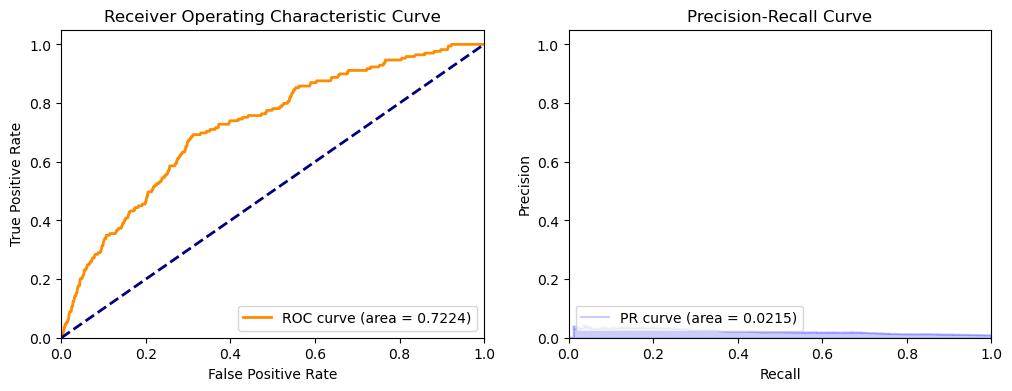

In [71]:
#Plot the Roc Curve
from matplotlib import pyplot as plt
from handyspark import BinaryClassificationMetrics


bcm = BinaryClassificationMetrics(pred_rf, scoreCol='probability', labelCol='label')
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])



In [57]:
#Check the threshold 
bcm.getMetricsByThreshold().toPandas()

C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


,threshold,fpr,recall,precision
0,0.705436,0.002510,0.0,0.000000
1,0.705394,0.002904,0.0,0.000000
2,0.699168,0.003052,0.0,0.000000
3,0.699126,0.003249,0.0,0.000000
4,0.689880,0.003495,0.0,0.000000
...,...,...,...,...
1131,0.101830,0.999803,1.0,0.008252
1132,0.090262,0.999852,1.0,0.008252
1133,0.081084,0.999951,1.0,0.008251
1134,0.075411,1.000000,1.0,0.008250


### 2.3 Logistics Regression

#### 2.3.1 Training the model

In [72]:
# Train a Logistics Regression
#  Empty categoricalFeaturesInfo indicates all features are continuous.
from pyspark.ml.classification import LogisticRegression

lrc = LogisticRegression(featuresCol="features", labelCol="label")
lrc = lrc.fit(trainingData)

# After training we will be testing out dataset
pred_lr = lrc.transform(testData)
pred_lr.show(3)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1724.0,17.0,1.0,...|    0|[-0.2546495554506...|[0.43667941785528...|       1.0|
|[120.0,7.0,1.0,1....|    0|[1.46456574218066...|[0.81223000007629...|       0.0|
|[1387.0,19.0,0.0,...|    0|[1.18976517330825...|[0.76669906303081...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 3 rows



#### 2.3.2 Evaluating the model

In [73]:
# After training the model, we'll predict test data and check the accuracy metrics. Here, we can use MulticlassClassificationEvaluator to check the accuracy. 
#Confusion matrix can be created by using confusion_matrix function of sklearn.metrics module.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

evaluator_lr=MulticlassClassificationEvaluator(predictionCol="prediction")
#acc = evaluator.evaluate(pred)

#print("Prediction Accuracy: ", acc)

y_pred_lr=pred_lr.select("prediction").collect()
y_orig_lr=pred_lr.select("label").collect()

cm_lr = confusion_matrix(y_orig_lr, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

#Define the Evaluation Metrics
#Accuracy = (TP+TN)/(TP+TN+FP+FN)
accu_lr = evaluator_lr.evaluate(pred_lr)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
prec_lr=cm_lr[1,1]/(cm_lr[1,1]+cm_lr[1,0])

#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
recall_lr=cm_lr[1,1]/(cm_lr[1,1]+cm_lr[0,1])

#The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
f1_lr=2*((prec_lr*recall_lr)/(prec_lr+recall_lr))
#F1 = 2 * (precision * recall) / (precision + recall)

# Instantiate metrics object
metrics_lr = BinaryClassificationEvaluator()
auc_lr=metrics_lr.evaluate(pred_lr, {metrics_lr.metricName: 'areaUnderROC'})
#Source: https://towardsdatascience.com/binary-classifier-evaluation-made-easy-with-handyspark-3b1e69c12b4f

Confusion Matrix:
[[ 8745 11570]
 [   49   120]]


#### 2.3.3 ROC Curve

C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

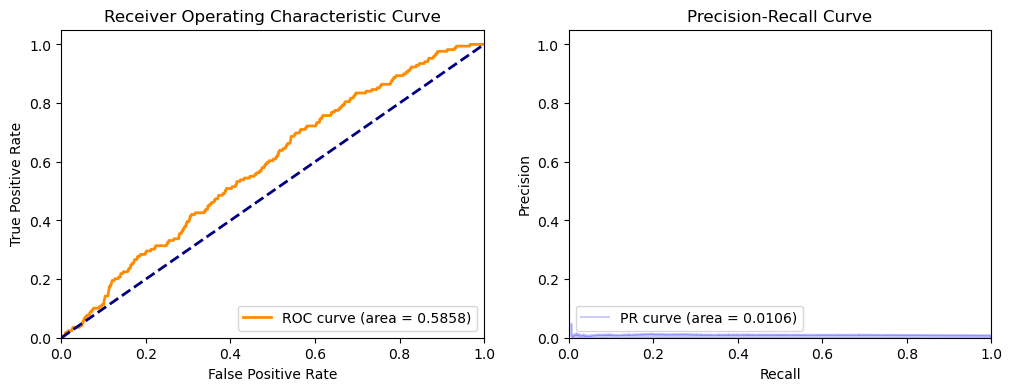

In [74]:
#Plot the Roc Curve
from matplotlib import pyplot as plt
from handyspark import BinaryClassificationMetrics


bcm_lr = BinaryClassificationMetrics(pred_lr, scoreCol='probability', labelCol='label')
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm_lr.plot_roc_curve(ax=axs[0])
bcm_lr.plot_pr_curve(ax=axs[1])

In [45]:
#Check the threshold 
bcm_lr.getMetricsByThreshold().toPandas()

C:\Users\Casa\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


,threshold,fpr,recall,precision
0,0.017897,0.000935,0.005917,0.050000
1,0.015054,0.001871,0.011834,0.050000
2,0.014179,0.002855,0.011834,0.033333
3,0.013564,0.003840,0.011834,0.025000
4,0.013143,0.004824,0.011834,0.020000
...,...,...,...,...
1003,0.000139,0.997588,1.000000,0.008270
1004,0.000123,0.998572,1.000000,0.008262
1005,0.000006,0.999557,1.000000,0.008254
1006,0.000000,1.000000,1.000000,0.008250


## 3. Metrics Calculation

In [75]:
spark_results=pd.DataFrame(
    [
        [accu_dt,accu_rf,accu_lr],
        [prec_dt,prec_rf,prec_lr],
        [recall_dt,recall_rf,recall_lr],
        [f1_dt,f1_rf,f1_lr],
        [auc_dt,auc_rf,auc_lr]
    ],
    columns=["Decision Tree","Random Forest","Logistics Regression"],
    index=["Accuracy","Precision","Recall","F1_score", "AUC"])

In [76]:
spark_results

,Decision Tree,Random Forest,Logistics Regression
Accuracy,0.683475,0.693251,0.596055
Precision,0.745562,0.757396,0.710059
Recall,0.012932,0.013458,0.010265
F1_score,0.025424,0.026446,0.020238
AUC,0.561161,0.722424,0.585800


In [39]:
#Here we will terminate the spark session
spark.stop() 

In [138]:
#More Sources
#https://spark.apache.org/docs/latest/mllib-decision-tree.html
#https://spark.apache.org/docs/latest/ml-pipeline.html

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 55714)


In [ ]:
#The Mother Boarding End 
#https://www.youtube.com/watch?v=uXnG53304Hk&ab_channel=NextofKen